# Marketing campaign analysis

This case study aims to study the profitability of marketing campaigns, choose the most optimum marketing channel and allocate the budget accordingly.

The case study will follow the below workflow:

    1- Overview
    
    2- Data Exploration
    
    3- Data preparation and cleaning
    
    4- Exploratory data analysis (EDA)
    
    5- Cost calculation
    
    6- Profitability and ROI calculation 
    
    7- Mediums comparison
    
    8- Concolusion
 


### 1- Overview

This notebook will be using `Python` and some of its popular data analytics related packages. 

First of all, `pandas` will be imported to read the sales data in a confined time period  from a CSV file and manipulate it for further use. 

For visualizations, `seaborn` and `matplotlib` will be used. 

Then, I will explore the dataset, prepare and clean it for further processing. Then the dataset can be considered ready for exploration.

The next step will be calculating the overall costs in order to be able to determine the ROI of the campaign. 

The following campaign mediums will be studied for determining the best and most convenient channel to be used.
> **Facebook ads, Google ads, Mails campaign, SMS Campaign**

### 2- Data Exploration

In [1]:
# Importing libraries necessary for this project

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
# Reading in our orders dataset
orders = pd.read_csv('Orders.csv')

# Taking a look at the first few rows of the dataset
orders.head()

,Order Date,Orders Count,Total Sales
0,2023-06-01,1612,520778.84
1,2023-06-02,1565,459969.94
2,2023-06-03,1340,389993.06
3,2023-06-04,1297,371642.38
4,2023-06-05,1234,337039.66


### 3- Data preparation and cleaning

This section will explore the duplicated, null values (if any) in order to be dealt with before starting the analysis process.

In [3]:
orders.duplicated().sum()

0

No duplicated data is present.

In [4]:
orders.isna().sum()

Order Date      0
Orders Count    0
Total Sales     0
dtype: int64

Also, no null values are shown

In [5]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    116 non-null    datetime64[ns]
 1   Orders Count  116 non-null    int64         
 2   Total Sales   116 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.8 KB


**Now, the dataset is ready for processing**

### 4- Exploratory data analysis (EDA)

**1- Exploring the daily orders count**

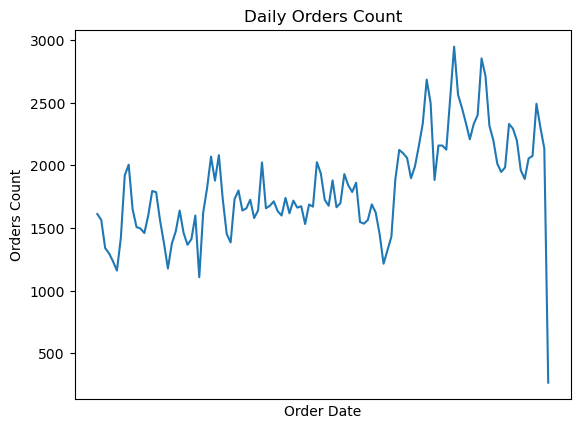

In [6]:
sns.lineplot(data=orders.groupby("Order Date")["Orders Count"].sum())
plt.xticks([])
plt.title('Daily Orders Count');

**2- Exploring the weekly orders count**

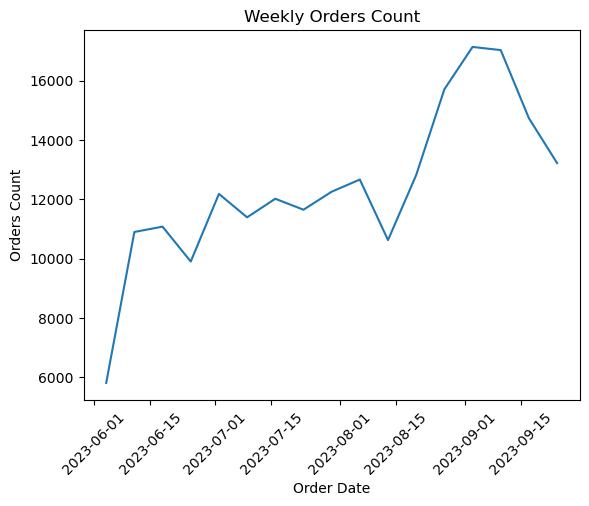

In [7]:
sns.lineplot(data=orders.groupby(pd.Grouper(key='Order Date', freq='W'))["Orders Count"].sum())
plt.xticks(rotation=45)
plt.title('Weekly Orders Count');

**3- Exploring the daily orders sales**

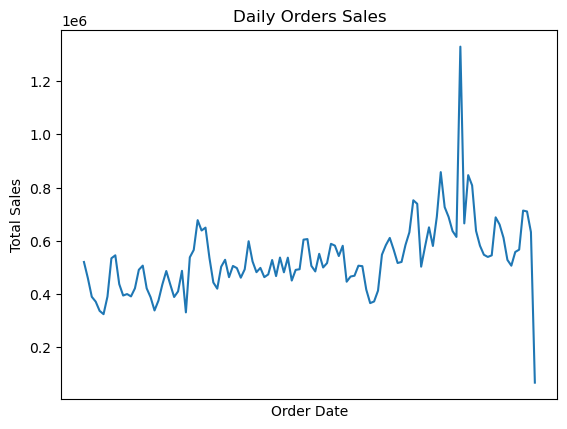

In [8]:
sns.lineplot(data=orders.groupby("Order Date")["Total Sales"].sum())
plt.xticks([])
plt.title('Daily Orders Sales');

**4- Exploring the weekly orders sales**

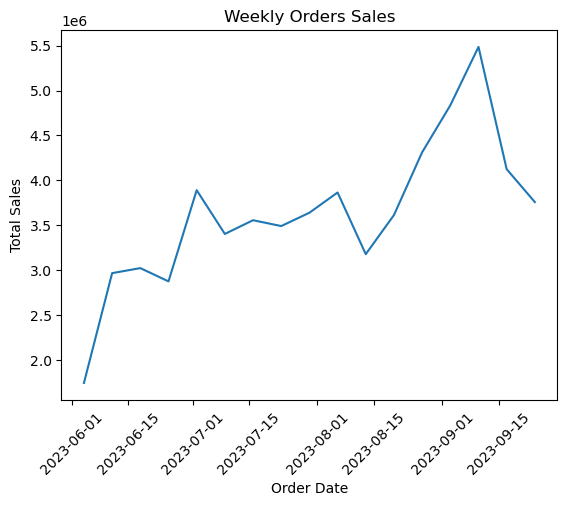

In [9]:
sns.lineplot(data=orders.groupby(pd.Grouper(key='Order Date', freq='W'))["Total Sales"].sum())
plt.xticks(rotation=45)
plt.title('Weekly Orders Sales');

From the shown above, it can be concluded that:

    1-Orders count and sales were increasing over the last period. However, it starts to decrease which indicates the importance of initiating a marketing campaign.
    
    2- Orders are higher in the first (2) weeks each month. Accordingly, it's the best time to initiate the campaign to maximize the sales leading to higher profitability and ROI.

### 5- Cost calculation

The following data is assumed upon **100K targeted new customers** and for a duration of **1 Month**. 

Next. showing the **average conversion rate** and the **initiation fixed cost**.

In [10]:
# Setting up average conversion rate per channel
mails_conversion = 0.03
sms_conversion = 0.15
fb_conversion = 0.09
google_conversion = 0.03

#Setting up initiation cost per channel
mails_cost = 5000
sms_cost = 4000
fb_cost = 10000
google_cost = 8000


channel_df = pd.DataFrame({'Channel':['Mail', 'SMS', 'FB ads', 'Google ads'],
                           'Conversion Rate':[mails_conversion, sms_conversion, fb_conversion, google_conversion],
                           'Initiation Cost':[mails_cost, sms_cost, fb_cost, google_cost]})


channel_df

,Channel,Conversion Rate,Initiation Cost
0,Mail,0.03,5000
1,SMS,0.15,4000
2,FB ads,0.09,10000
3,Google ads,0.03,8000


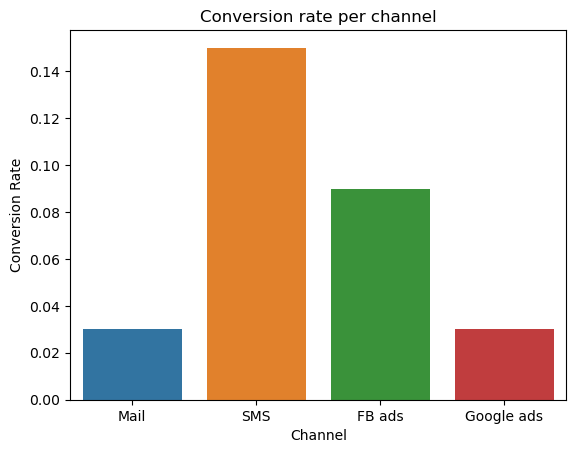

In [11]:
sns.barplot(x = 'Channel', y = 'Conversion Rate', data = channel_df)
plt.title('Conversion rate per channel')
plt.show;

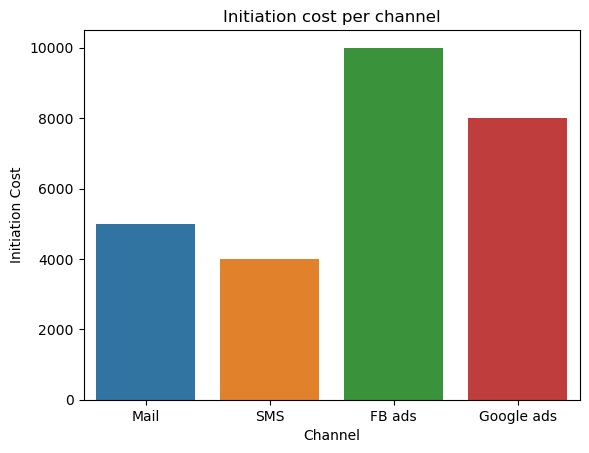

In [12]:
sns.barplot(x = 'Channel', y = 'Initiation Cost', data = channel_df)
plt.title('Initiation cost per channel')
plt.show;

Exploring the additional costs:
    
    1- Delivery promotional fee: 5 SAR
    2- Jahez App commission: 15%
    3- Overall cost: 30% cost per order. Including all labor, equipment and operational costs.

In [13]:
#Variable Costs

delivery_charge_expense = 5
app_commision = 0.15
operational_cost = 0.3

**Exploring Daily Average Basket Size**

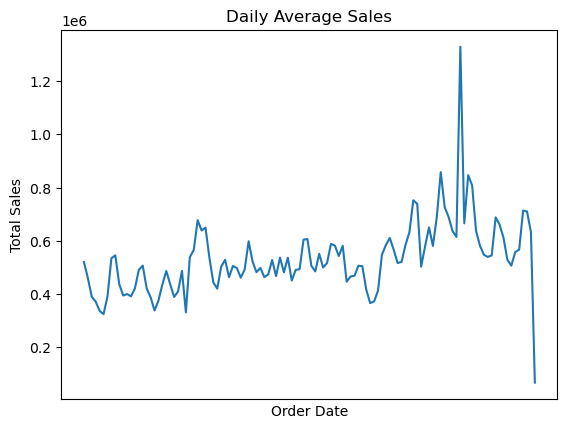

In [14]:
sns.lineplot(data=orders.groupby("Order Date")["Total Sales"].mean())
plt.xticks([])
plt.title('Daily Average Sales');

**Overall Average Basket Size**

In [15]:
avg_basket = orders['Total Sales'].sum()/orders['Orders Count'].sum()
print('Average basket size in SAR')
print(f"{round(avg_basket,2):,}")

Average basket size in SAR
292.46


**Average Daily Orders Count** 

In [16]:
avg_orders = orders['Orders Count'].mean()
print('Average daily orders')
print(f"{round(avg_orders,2):,}")

Average daily orders
1,820.22


In [17]:
# Getting the average daily sales
avg_daily_sales = avg_orders * avg_basket
print('Average daily sales in SAR')
print(f"{round(avg_daily_sales,2):,}")

Average daily sales in SAR
532,346.29


So, the average basket size can be determined as **292.46 SAR**, average daily total sales as **532,346.29 SAR** and daily average orders **1820 orders**.

### 6- Profitability and ROI calculation 

In [18]:
# Knowing that this campaign's duration is 30 days
days = 30


estimated_sales = pd.DataFrame({'Channel':['Mail', 'SMS', 'FB ads', 'Google ads'],
                                'Increase in orders':[
                                     round(mails_conversion * avg_orders * days, 2),
                                     round(sms_conversion * avg_orders * days, 2),
                                     round(fb_conversion * avg_orders * days, 2),
                                     round(google_conversion * avg_orders * days, 2)],
                                
                                'Overall Orders': [
                                    round((1 + mails_conversion) * avg_orders * days, 2),
                                     round((1 + sms_conversion) * avg_orders * days, 2),
                                     round((1 + fb_conversion) * avg_orders * days, 2),
                                     round((1 + google_conversion) * avg_orders * days, 2)],
                                
                                'Increase in sales':[
                                    round(mails_conversion * avg_daily_sales * days, 2),
                                    round(sms_conversion*avg_daily_sales * days ,2),
                                    round(fb_conversion*avg_daily_sales * days ,2),
                                    round(google_conversion*avg_daily_sales * days ,2)
                                ],
                                
                                'Overall sales':[
                                    round((1 + mails_conversion) * avg_daily_sales * days, 2),
                                    round((1 + sms_conversion)*avg_daily_sales * days ,2),
                                    round((1 + fb_conversion)*avg_daily_sales * days ,2),
                                    round((1 + google_conversion)*avg_daily_sales * days ,2)
                                ],
                                
                                'Marketing Cost':[
                                    round(mails_cost + (delivery_charge_expense * avg_orders * days * (1 + mails_conversion)), 2),
                                    round(sms_cost + (delivery_charge_expense * avg_orders * days * (1 + sms_conversion)), 2),
                                    round(fb_cost + (delivery_charge_expense * avg_orders * days * (1 + fb_conversion)), 2),
                                    round(google_cost + (delivery_charge_expense * avg_orders * days * (1 + google_conversion)), 2)
                                ]                                
                               })
print("\nEstimated Data")

estimated_sales['Overall Cost'] = round(estimated_sales['Marketing Cost'] + ((app_commision + operational_cost) * estimated_sales['Overall sales']), 2)
estimated_sales['Net Profit'] = round(estimated_sales['Overall sales'] - estimated_sales['Overall Cost'], 2)
estimated_sales['Marketing cost per order'] = round(estimated_sales['Marketing Cost'] / estimated_sales['Overall Orders'] , 2)
estimated_sales['ROI %'] = round(estimated_sales['Net Profit'] / estimated_sales['Overall Cost'] * 100 , 2)

estimated_sales


Estimated Data


,Channel,Increase in orders,Overall Orders,Increase in sales,Overall sales,Marketing Cost,Overall Cost,Net Profit,Marketing cost per order,ROI %
0,Mail,1638.19,56244.66,479111.66,16449500.42,286223.30,7688498.49,8761001.93,5.09,113.95
1,SMS,8190.97,62797.44,2395558.31,18365947.07,317987.18,8582663.36,9783283.71,5.06,113.99
2,FB ads,4914.58,59521.05,1437334.99,17407723.74,307605.24,8141080.92,9266642.82,5.17,113.83
3,Google ads,1638.19,56244.66,479111.66,16449500.42,289223.30,7691498.49,8758001.93,5.14,113.87


Exploring the above data: 

**Channel:**
The marketing channel to be used to contact the customers.

**Increase in orders:**
The `increase in orders` generated in the campaign's duration (30 days) due to conversion of targeted customers.

**Overall Orders:**
The `total orders` generated in the campaign's duration (30 days) due to conversion of targeted customers.

**Increase in sales:**
The `increase in orders` generated in the campaign's duration (30 days) due to conversion of targeted customers.

**Overall Orders:**
The `total sales` generated in the campaign's duration (30 days) due to conversion of targeted customers.

**Marketing cost:**
The cost spent for marketing `(Campaign initiation cost + Promotional Delivery Charge of 5 SAR)` in the campaign's duration (30 days).

**Overall Cost:**
The total cost spent `(marketing cost + operational cost (30 % for all operations cost + 15% for Jahez app commission))` in the campaign's duration (30 days) considering the conversion rate of each channel.

**Net Profit:**
The generated profit after deducting the overall cost in the campaign's duration (30 days).

**Marketing cost per order:**
The cost spent for marketing per order.

\begin{equation}
CPO = \frac{Marketing Cost}{Overall Orders}
\end{equation}


**ROI %:**
\begin{equation}
ROI = \frac{Net Profit \times 100}{Marketing Cost}
\end{equation}


### 7- Channels comparison

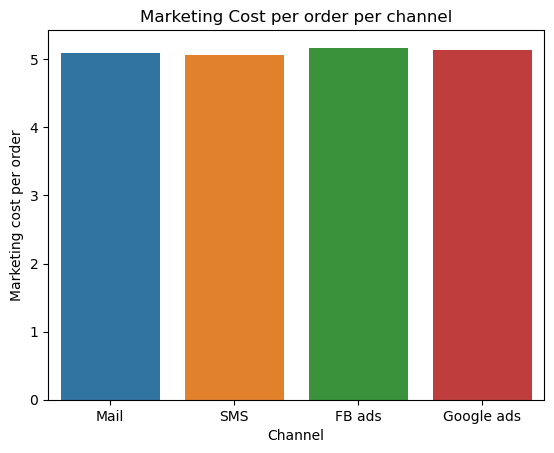

In [19]:
sns.barplot(x = 'Channel', y = 'Marketing cost per order', data = estimated_sales)
plt.title('Marketing Cost per order per channel')
plt.show;

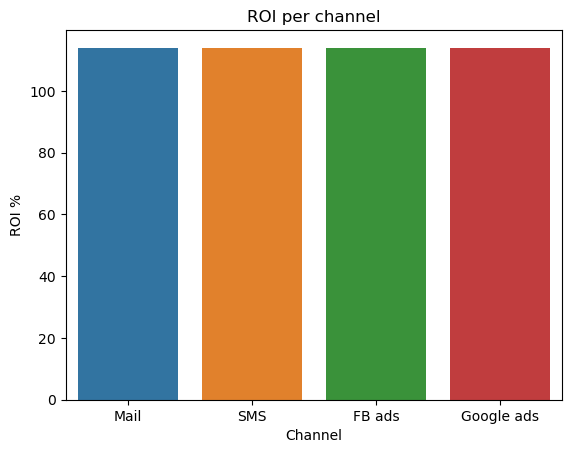

In [20]:
sns.barplot(x = 'Channel', y = 'ROI %', data = estimated_sales)
plt.title('ROI per channel')
plt.show;

### 8- Conclusion

1-Orders count and sales were increasing over the last period. However, it starts to decrease which indicates the importance of initiating a marketing campaign.

2- Orders are higher in the **first (2) weeks each month**. Accordingly, it's the best time to initiate the campaign to maximize the sales leading to higher profitability and ROI.

3- All channels guarantee profitability provided the assumed data as following:
>Campaign Duration: 30 days

>Operational cost: 30%

>| Channel     | Conversion Rate | Initiation Cost |
|-------------|----------------|----------------|
| Mail        | 0.03           | 5000           |
| SMS         | 0.15           | 4000           |
| FB ads      | 0.09           | 10000          |
| Google ads  | 0.03           | 8000           |


4- All channels generate almost the same ROI and cost per order. However, the SMS channel has a slight advantage in both metrics.

5- The SMS channel is the highest in conversion rate and also the lowest in initiation cost. Therefore, it's the most recommended channel to be used in order to acquire new customers in order to increase the customers' base and retention rate.